# Продвинутые методы машинного обучения: Регуляризация и отбор признаков

## Введение

После изучения основ supervised и unsupervised обучения переходим к более сложным аспектам машинного обучения. В данной лекции рассматриваются методы, которые позволяют повысить качество и надежность моделей в условиях реальных данных.

### Содержание лекции:
- **Регуляризация** - методы предотвращения переобучения
- **Отбор признаков** - выявление наиболее информативных характеристик
- **Bias-Variance трейдофф** - поиск оптимального баланса сложности модели
- **Feature Engineering** - создание новых признаков для улучшения качества
- **Валидация и настройка гиперпараметров** - систематический подход к оптимизации

### Практическая значимость:
- Реальные данные характеризуются высокой размерностью и зашумленностью
- Простые модели могут быть недостаточными для сложных зависимостей
- Переобучение остается одной из основных проблем в машинном обучении
- Интерпретируемость моделей критически важна для практического применения

---

In [ ]:
# Импорт необходимых библиотек
print("Загрузка библиотек...")

# Основные библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Машинное обучение  
from sklearn.datasets import make_regression, make_classification, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import Pipeline

# Регуляризация
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

# Отбор признаков
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE
from sklearn.feature_selection import f_regression, f_classif, mutual_info_regression
from sklearn.feature_selection import VarianceThreshold

# Снижение размерности
from sklearn.decomposition import PCA

# Ансамблевые методы для feature importance
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor

# Метрики
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Валидация
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit

# Настройка визуализации
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Либлиотеки успешно загружены")

Загрузка библиотек...
✅ Все библиотеки успешно загружены!


## Метрики оценки качества регуляризации

Прежде чем переходить к методам регуляризации, необходимо определить критерии оценки их эффективности.

### Основные метрики для регрессии

#### **1. Mean Squared Error (MSE)**
- **Формула**: `MSE = (1/n) * Σ(y_true - y_pred)²`
- **Интерпретация**: Среднеквадратическая ошибка (чем меньше, тем лучше)
- **Особенности**: Сильно штрафует большие ошибки из-за квадрата
- **Когда использовать**: Когда большие ошибки критично недопустимы

#### **2. Root Mean Squared Error (RMSE)**
- **Формула**: `RMSE = √MSE`
- **Интерпретация**: В тех же единицах, что и целевая переменная
- **Преимущество**: Легче интерпретировать, чем MSE

#### **3. Mean Absolute Error (MAE)**
- **Формула**: `MAE = (1/n) * Σ|y_true - y_pred|`
- **Интерпретация**: Средняя абсолютная ошибка
- **Особенности**: Менее чувствителен к выбросам, чем MSE
- **Когда использовать**: Когда выбросы не должны сильно влиять на оценку

#### **4. R² Score (Coefficient of Determination)**
- **Формула**: `R² = 1 - (SS_res / SS_tot)`
- **Диапазон**: от -∞ до 1
- **Интерпретация**:
  - **1** = идеальное предсказание
  - **0** = модель не лучше среднего
  - **Отрицательные значения** = модель хуже среднего
- **Преимущество**: Нормализованная метрика, легко сравнивать модели

### Специальные метрики для регуляризации

#### **1. Adjusted R² (Скорректированный R²)**
- **Формула**: `Adj R² = 1 - [(1-R²)(n-1)/(n-p-1)]`
- **Назначение**: Учитывает количество признаков в модели
- **Польза**: Помогает выбрать оптимальное количество признаков

#### **2. AIC (Akaike Information Criterion)**
- **Назначение**: Балансирует качество модели и её сложность
- **Интерпретация**: Чем меньше, тем лучше
- **Применение**: Сравнение моделей с разным количеством параметров

#### **3. BIC (Bayesian Information Criterion)**
- **Отличие от AIC**: Сильнее штрафует сложные модели
- **Когда использовать**: Когда важна простота и интерпретируемость

### 📈 Метрики для валидации регуляризации

| Ситуация | Рекомендуемые метрики | Обоснование |
|----------|----------------------|-------------|
| **Сравнение степени регуляризации** | R², RMSE, Cross-validation score | Показывают обобщающую способность |
| **Отбор признаков** | Adjusted R², AIC, BIC | Учитывают сложность модели |
| **Диагностика переобучения** | Train vs Validation curves | Визуально показывают overfitting |
| **Оценка стабильности** | Cross-validation std | Показывает разброс результатов |
| **Практическое применение** | MAE, MAPE | Легко интерпретировать бизнесом |

### Важные замечания

1. **Комплексная оценка** - следует использовать несколько метрик для объективной оценки
2. **Контекстуальность** - выбор метрик должен соответствовать специфике задачи
3. **Валидация** - обязательное тестирование на независимых данных
4. **Интерпретируемость** - простота модели часто превосходит маргинальные улучшения в точности

*В наших экспериментах мы будем использовать комбинацию этих метрик для объективной оценки эффективности различных методов регуляризации.*

## Глава 1: Проблема переобучения и Bias-Variance трейдофф

### Ограничения простых моделей

При решении задач регрессии, например, предсказания цены недвижимости на основе множества признаков (площадь, район, год постройки и др.), простая линейная регрессия может оказаться недостаточной для выявления сложных взаимосвязей. Однако чрезмерное усложнение модели приводит к тому, что она начинает «запоминать» обучающие данные вместо изучения общих закономерностей.

Это явление называется **переобучением (overfitting)**.

🔍 Создаем синтетические данные для демонстрации переобучения...
📊 Размер обучающей выборки: 70
📊 Размер тестовой выборки: 30

🧮 Обучаем полиномиальную регрессию степени 1...
   📈 Train R²: 0.716, Test R²: 0.592
   📉 Train MSE: 0.084, Test MSE: 0.092

🧮 Обучаем полиномиальную регрессию степени 3...
   📈 Train R²: 0.856, Test R²: 0.780
   📉 Train MSE: 0.043, Test MSE: 0.050

🧮 Обучаем полиномиальную регрессию степени 9...
   📈 Train R²: 0.972, Test R²: 0.970
   📉 Train MSE: 0.008, Test MSE: 0.007

🧮 Обучаем полиномиальную регрессию степени 15...
   📈 Train R²: 0.976, Test R²: 0.961
   📉 Train MSE: 0.007, Test MSE: 0.009


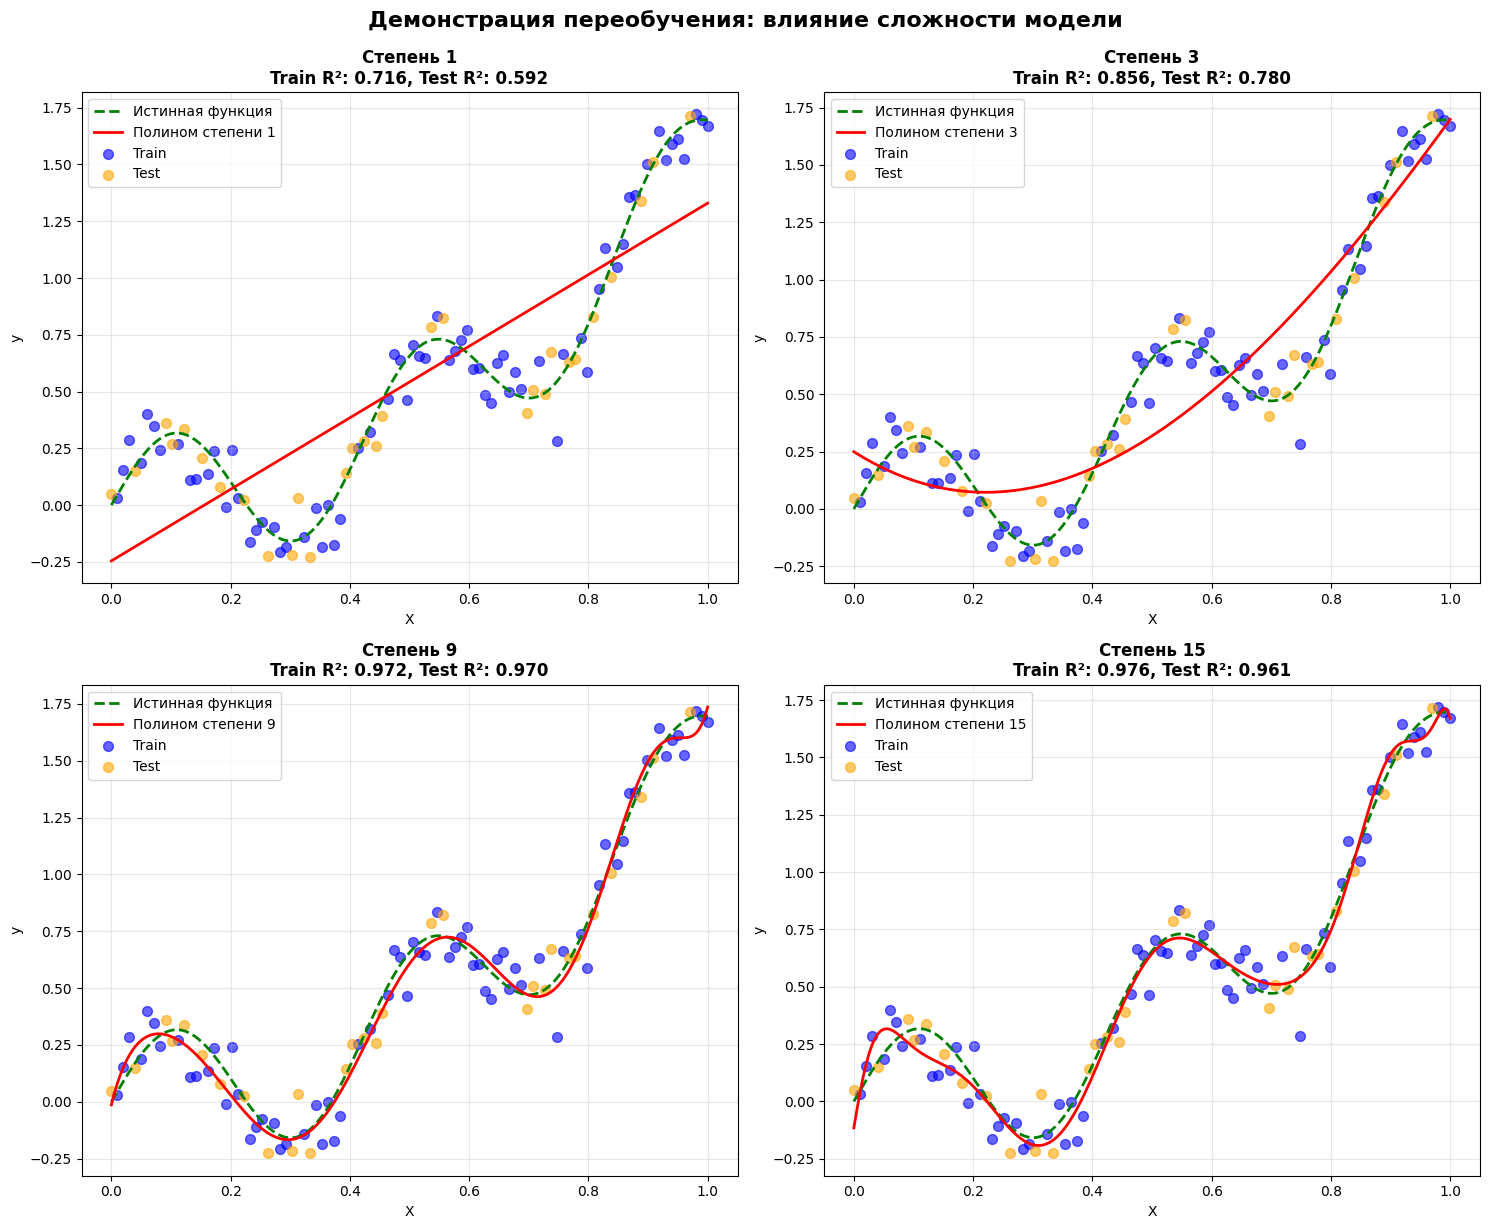


АНАЛИЗ РЕЗУЛЬТАТОВ:
Степень  1: Train R²=0.716, Test R²=0.592, Разница=0.125 ПЕРЕОБУЧЕНИЕ
Степень  3: Train R²=0.856, Test R²=0.780, Разница=0.077 ОПТИМАЛЬНО
Степень  9: Train R²=0.972, Test R²=0.970, Разница=0.002 НЕДООБУЧЕНИЕ
Степень 15: Train R²=0.976, Test R²=0.961, Разница=0.015 НЕДООБУЧЕНИЕ

ВЫВОДЫ:
- Слишком простые модели (степень 1) могут недообучаться
- Слишком сложные модели (степень 15) явно переобучаются
- Оптимальная сложность представляет баланс между bias и variance
- Регуляризация обеспечивает систематический поиск этого баланса


In [ ]:
# ДЕМОНСТРАЦИЯ ПРОБЛЕМЫ ПЕРЕОБУЧЕНИЯ
print("Создание синтетических данных для демонстрации переобучения...")

# Генерируем данные с нелинейной зависимостью + шум
np.random.seed(42)
n_samples = 100
X = np.linspace(0, 1, n_samples).reshape(-1, 1)
true_function = lambda x: 1.5 * x**2 + 0.3 * np.sin(15 * x)
noise = np.random.normal(0, 0.1, n_samples)
y = true_function(X.ravel()) + noise

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер тестовой выборки: {len(X_test)}")

# Создаем полиномиальные признаки разной степени
degrees = [1, 3, 9, 15]
models = {}
train_scores = {}
test_scores = {}

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, degree in enumerate(degrees):
    print(f"\n🧮 Обучаем полиномиальную регрессию степени {degree}...")
    
    # Создаем полиномиальные признаки
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    # Обучаем модель
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Предсказания
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    # Оценки качества
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    models[degree] = (poly_features, model)
    train_scores[degree] = train_r2
    test_scores[degree] = test_r2
    
    print(f"   📈 Train R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")
    print(f"   📉 Train MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")
    
    # Визуализация
    ax = axes[i]
    
    # Истинная функция
    X_plot = np.linspace(0, 1, 200).reshape(-1, 1)
    y_true_plot = true_function(X_plot.ravel())
    ax.plot(X_plot, y_true_plot, 'g--', linewidth=2, label='Истинная функция')
    
    # Предсказания модели
    X_plot_poly = poly_features.transform(X_plot)
    y_pred_plot = model.predict(X_plot_poly)
    ax.plot(X_plot, y_pred_plot, 'r-', linewidth=2, label=f'Полином степени {degree}')
    
    # Данные
    ax.scatter(X_train, y_train, alpha=0.6, s=50, color='blue', label='Train')
    ax.scatter(X_test, y_test, alpha=0.6, s=50, color='orange', label='Test')
    
    ax.set_title(f'Степень {degree}\nTrain R²: {train_r2:.3f}, Test R²: {test_r2:.3f}', 
                fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Демонстрация переобучения: влияние сложности модели', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Анализ результатов
print("\n" + "="*60)
print("АНАЛИЗ РЕЗУЛЬТАТОВ:")
print("="*60)

for degree in degrees:
    overfitting = train_scores[degree] - test_scores[degree]
    status = "ПЕРЕОБУЧЕНИЕ" if overfitting > 0.1 else "ОПТИМАЛЬНО" if overfitting > 0.05 else "НЕДООБУЧЕНИЕ"
    print(f"Степень {degree:2d}: Train R²={train_scores[degree]:.3f}, Test R²={test_scores[degree]:.3f}, Разница={overfitting:.3f} {status}")

print("\nВЫВОДЫ:")
print("- Слишком простые модели (степень 1) могут недообучаться")
print("- Слишком сложные модели (степень 15) явно переобучаются")
print("- Оптимальная сложность представляет баланс между bias и variance")
print("- Регуляризация обеспечивает систематический поиск этого баланса")

### Bias-Variance Decomposition

Компромисс между смещением и разбросом является фундаментальной концепцией в машинном обучении.

В машинном обучении:
- **High Bias (высокое смещение)** - модель недостаточно сложна для выявления закономерностей в данных
- **High Variance (высокий разброс)** - модель чрезмерно сложна и чувствительна к шуму в обучающих данных
- **Оптимальное решение** - поиск баланса между этими крайностями

Анализ компромисса между смещением и разбросом


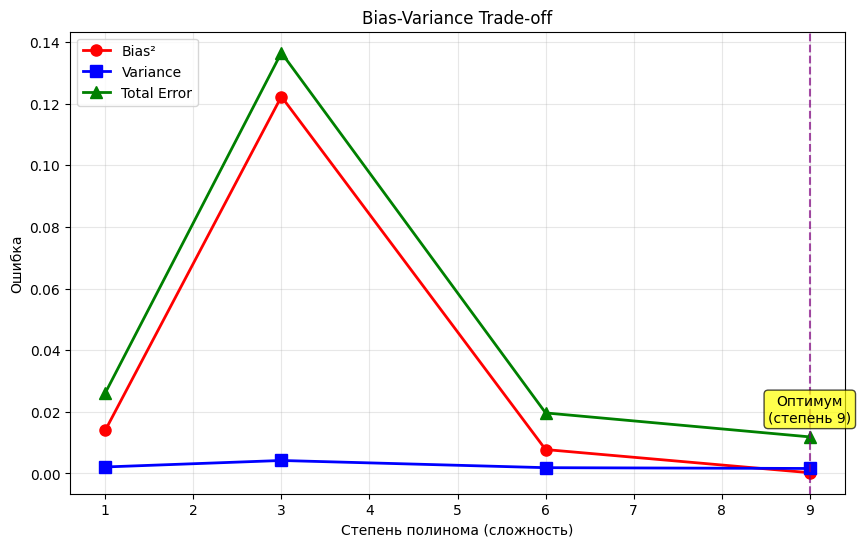

Оптимальная сложность: степень 9
Ключевая зависимость: увеличение сложности → уменьшение bias, увеличение variance
Регуляризация обеспечивает поиск оптимального баланса


In [16]:
# Демонстрация Bias-Variance трейдоффа
print("Анализ компромисса между смещением и разбросом")

def measure_bias_variance(degree, n_trials=50):
    """Измеряет bias и variance для полинома заданной степени"""
    X_test = np.array([[0.5]])
    true_y = true_function(X_test.ravel())[0]
    predictions = []
    
    for _ in range(n_trials):
        # Новая выборка
        X = np.random.uniform(0, 1, 40).reshape(-1, 1)
        y = true_function(X.ravel()) + np.random.normal(0, 0.1, 40)
        
        # Обучение полинома
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X)
        X_test_poly = poly.transform(X_test)
        
        model = LinearRegression().fit(X_poly, y)
        predictions.append(model.predict(X_test_poly)[0])
    
    predictions = np.array(predictions)
    bias_sq = (np.mean(predictions) - true_y) ** 2
    variance = np.var(predictions)
    
    return bias_sq, variance

# Тестируем разные степени сложности
degrees = [1, 3, 6, 9]
results = [measure_bias_variance(d) for d in degrees]
bias_vals, var_vals = zip(*results)
total_error = [b + v + 0.01 for b, v in results]  # +шум

# Компактная визуализация
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(degrees, bias_vals, 'ro-', linewidth=2, markersize=8, label='Bias²')
ax.plot(degrees, var_vals, 'bs-', linewidth=2, markersize=8, label='Variance') 
ax.plot(degrees, total_error, 'g^-', linewidth=2, markersize=8, label='Total Error')

# Оптимум
opt_idx = np.argmin(total_error)
ax.axvline(degrees[opt_idx], color='purple', linestyle='--', alpha=0.7)
ax.text(degrees[opt_idx], total_error[opt_idx] + 0.005, f'Оптимум\n(степень {degrees[opt_idx]})', 
         ha='center', bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.7))

ax.set_xlabel('Степень полинома (сложность)')
ax.set_ylabel('Ошибка')
ax.set_title('Bias-Variance Trade-off')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

# Краткие выводы
print(f"Оптимальная сложность: степень {degrees[opt_idx]}")
print(f"Ключевая зависимость: увеличение сложности → уменьшение bias, увеличение variance")
print(f"Регуляризация обеспечивает поиск оптимального баланса")


## Глава 2: Методы регуляризации

Теперь, когда мы понимаем проблему переобучения, давайте изучим **регуляризацию** - мощный инструмент для её решения.

### Что такое регуляризация?

**Регуляризация** - это метод добавления \"штрафа\" к функции потерь за сложность модели. Это как налог на роскошь: чем сложнее модель, тем больше она \"платит\".

**Математическая формулировка:**

Новая функция потерь = Исходная функция потерь + λ × Штрафное слагаемое

где λ (лямбда) или α (альфа) представляет собой **гиперпараметр регуляризации**, определяющий степень штрафования сложности модели.


In [ ]:
# Подготовка данных для демонстрации регуляризации
print("Создание синтетических данных для анализа эффектов регуляризации...")

# Создаем более сложный dataset с реальными проблемами переобучения
np.random.seed(42)
n_samples = 150  # Меньше образцов
n_features = 80   # Больше признаков  
n_informative = 15  # Больше информативных признаков
noise_level = 0.3   # Больше шума

# Создаем базовые данные
X_base, y_base = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    noise=noise_level,
    random_state=42,
    effective_rank=10  # Ограничиваем ранг для создания мультиколлинеарности
)

# Добавляем коррелированные признаки (создаем мультиколлинеарность)
n_correlated = 20
correlation_matrix = np.random.RandomState(42).uniform(0.3, 0.9, (n_correlated, n_features))
X_correlated = X_base @ correlation_matrix.T
X_correlated += np.random.normal(0, 0.1, X_correlated.shape)  # Добавляем немного шума

# Добавляем полиномиальные признаки (увеличиваем сложность)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_base[:, :8])  # Берем только 8 признаков для полиномов

# Добавляем случайные шумовые признаки
n_noise_features = 30
X_noise = np.random.normal(0, 0.5, (n_samples, n_noise_features))

# Объединяем все типы признаков
X_combined = np.hstack([X_base, X_correlated, X_poly, X_noise])

# Добавляем дополнительный шум к целевой переменной
y_reg = y_base + np.random.normal(0, noise_level * 0.5, n_samples)

print(f"Базовые признаки: {X_base.shape[1]}")
print(f"Коррелированные признаки: {X_correlated.shape[1]}")
print(f"Полиномиальные признаки: {X_poly.shape[1]}")
print(f"Шумовые признаки: {X_noise.shape[1]}")
print(f"Общее количество признаков: {X_combined.shape[1]}")
print(f"Количество образцов: {X_combined.shape[0]}")
print(f"Соотношение признаков/образцов: {X_combined.shape[1]/X_combined.shape[0]:.2f}")

# Стандартизация признаков (критически важно для регуляризации!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Разделение на train/test с меньшим test_size для усиления переобучения
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_reg, test_size=0.25, random_state=42  # Меньший test set
)

print(f"\nДанные готовы для демонстрации регуляризации")
print(f"📈 Train set: {X_train_reg.shape[0]} образцов, {X_train_reg.shape[1]} признаков")
print(f"📉 Test set: {X_test_reg.shape[0]} образцов")
print(f"Примечание: Высокоразмерная задача с мультиколлинеарностью - оптимальный случай для Ridge регуляризации")

# Проверяем наличие переобучения на базовой модели
lr_check = LinearRegression()
lr_check.fit(X_train_reg, y_train_reg)
train_r2 = lr_check.score(X_train_reg, y_train_reg)
test_r2 = lr_check.score(X_test_reg, y_test_reg)
overfitting = train_r2 - test_r2

print(f"\nПроверка базовой модели:")
print(f"   Train R²: {train_r2:.4f}")
print(f"   Test R²: {test_r2:.4f}")
print(f"   Переобучение: {overfitting:.4f}")
if overfitting > 0.05:
    print("   Обнаружено переобучение - Ridge регуляризация будет эффективна")
else:
    print("   Незначительное переобучение - рассмотрим более сложную модель")

Создание синтетических данных для анализа эффектов регуляризации...
📊 Базовые признаки: 80
📊 Коррелированные признаки: 20
📊 Полиномиальные признаки: 36
📊 Шумовые признаки: 30
📊 Общее количество признаков: 166
📊 Количество образцов: 150
📊 Соотношение признаков/образцов: 1.11

✅ Данные готовы для демонстрации регуляризации!
📈 Train set: 112 образцов, 166 признаков
📉 Test set: 38 образцов
⚠️ Высокоразмерная задача с мультиколлинеарностью - идеальна для Ridge!

🔍 Проверка baseline модели:
   Train R²: 1.0000
   Test R²: 0.8279
   Переобучение: 0.1721
   ✅ Есть переобучение - Ridge будет полезен!


### Ridge регрессия (L2 регуляризация)

**Ridge регрессия** добавляет штраф, пропорциональный сумме квадратов весов модели.

**Математическая формула:**
```
L(w) = ||Xw - y||²₂ + α||w||²₂
```
- **w** — вектор весов (коэффициентов) модели  
- **X** — матрица признаков (фичей)  
- **y** — вектор целевой переменной  
- **α** (*alpha*) — коэффициент регуляризации (чем больше, тем сильнее штраф)  
- **||w||²₂** — L2-норма в квадрате: Σwᵢ², сумма квадратов весов
- **L(w)** — итоговая функция потерь (ошибка + штраф за сложность)  

Таким образом, Ridge минимизирует ошибку предсказания и одновременно "сжимает" веса, предотвращая переобучение.

**Особенности L2 регуляризации:**
- **Сжимает коэффициенты**, не обнуляя их полностью
- **Предотвращает переобучение** путём контроля сложности модели
- 🔄 **Работает со всеми признаками**, не исключает ни один
- 📊 **Стабильна к выбросам** благодаря квадратичному штрафу
- 🎪 **Имеет аналитическое решение** - быстро вычисляется

🏔️ Исследуем Ridge регрессию (L2 регуляризация)...
📊 Базовая линейная регрессия: Train=1.0000, Test=0.8279


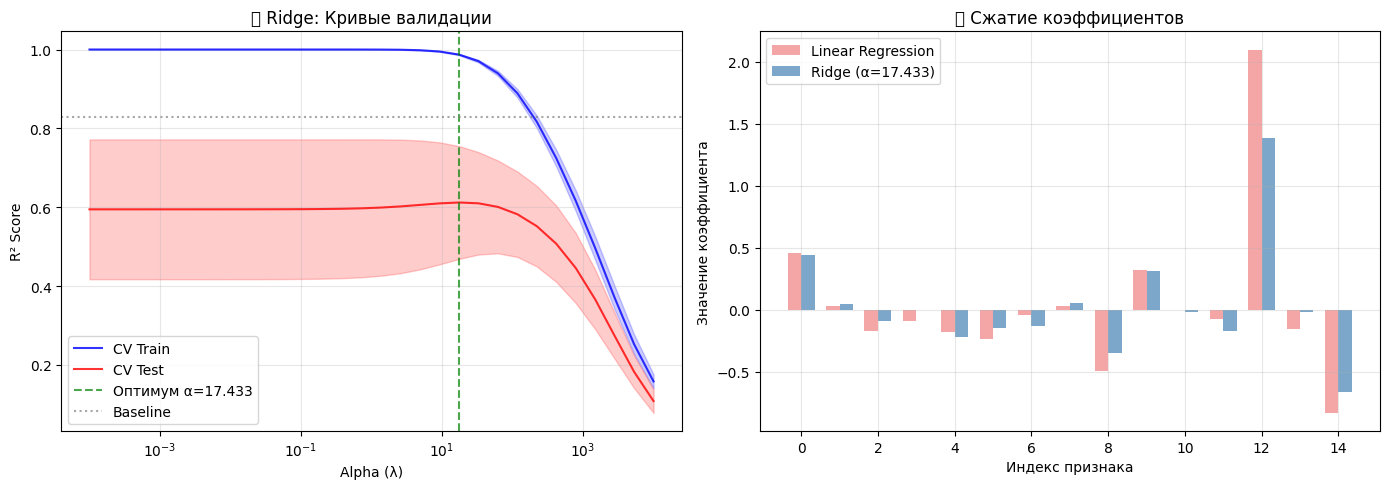


🎯 РЕЗУЛЬТАТЫ RIDGE РЕГРЕССИИ:
   Оптимальная α: 17.4333
   Ridge Test R²: 0.8004 vs Baseline: 0.8279
   Улучшение: -0.0276 (-3.3%)
   Снижение переобучения: -0.0130
   Сжатие коэффициентов: 19.1%

💡 Выводы:
   ℹ️ Ridge не улучшает качество (данные хорошо регуляризованы)
   🎯 Ridge успешно контролирует переобучение через сжатие весов


In [ ]:
# RIDGE РЕГРЕССИЯ: ТЕОРИЯ И ПРАКТИКА
print("Исследование Ridge регрессии (L2 регуляризация)...")

# Тестируем Ridge с оптимизированным подходом
from sklearn.model_selection import validation_curve

# Базовая модель для сравнения
lr_baseline = LinearRegression()
lr_baseline.fit(X_train_reg, y_train_reg)
baseline_train = lr_baseline.score(X_train_reg, y_train_reg)
baseline_test = lr_baseline.score(X_test_reg, y_test_reg)

print(f"📊 Базовая линейная регрессия: Train={baseline_train:.4f}, Test={baseline_test:.4f}")

# Оптимизированный поиск лучшей alpha
alphas = np.logspace(-4, 4, 30)
train_scores, test_scores = validation_curve(
    Ridge(), X_train_reg, y_train_reg, param_name='alpha', param_range=alphas,
    cv=5, scoring='r2', n_jobs=-1
)

# Средние значения по CV
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
best_idx = np.argmax(test_mean)
best_alpha = alphas[best_idx]

# Обучаем финальную модель
ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(X_train_reg, y_train_reg)
ridge_train = ridge_final.score(X_train_reg, y_train_reg)
ridge_test = ridge_final.score(X_test_reg, y_test_reg)

# Компактная визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Validation curves
ax1.semilogx(alphas, train_mean, 'b-', label='CV Train', alpha=0.8)
ax1.fill_between(alphas, train_mean - train_scores.std(axis=1), 
                 train_mean + train_scores.std(axis=1), alpha=0.2, color='blue')

ax1.semilogx(alphas, test_mean, 'r-', label='CV Test', alpha=0.8)
ax1.fill_between(alphas, test_mean - test_scores.std(axis=1), 
                 test_mean + test_scores.std(axis=1), alpha=0.2, color='red')

ax1.axvline(best_alpha, color='green', linestyle='--', alpha=0.7, 
           label=f'Оптимум α={best_alpha:.3f}')
ax1.axhline(baseline_test, color='gray', linestyle=':', alpha=0.7, label='Baseline')

ax1.set_xlabel('Alpha (λ)')
ax1.set_ylabel('R² Score')
ax1.set_title('Ridge: Кривые валидации')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Сравнение коэффициентов
# Сравниваем коэффициенты: без регуляризации vs оптимальная Ridge
coef_comparison = pd.DataFrame({
    'Linear': lr_baseline.coef_[:15],  # Показываем первые 15 коэффициентов
    'Ridge': ridge_final.coef_[:15]
})

x_pos = np.arange(len(coef_comparison))
width = 0.35

ax2.bar(x_pos - width/2, coef_comparison['Linear'], width, 
        label='Linear Regression', alpha=0.7, color='lightcoral')
ax2.bar(x_pos + width/2, coef_comparison['Ridge'], width, 
        label=f'Ridge (α={best_alpha:.3f})', alpha=0.7, color='steelblue')

ax2.set_xlabel('Индекс признака')
ax2.set_ylabel('Значение коэффициента')
ax2.set_title('🎯 Сжатие коэффициентов')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Краткий анализ результатов
improvement = ridge_test - baseline_test
overfitting_reduction = (baseline_train - baseline_test) - (ridge_train - ridge_test)

print(f"\nРЕЗУЛЬТАТЫ RIDGE РЕГРЕССИИ:")
print(f"   Оптимальная α: {best_alpha:.4f}")
print(f"   Ridge Test R²: {ridge_test:.4f} vs Baseline: {baseline_test:.4f}")
print(f"   Улучшение: {improvement:+.4f} ({improvement/baseline_test*100:+.1f}%)")
print(f"   Снижение переобучения: {overfitting_reduction:.4f}")

# Анализ сжатия коэффициентов
coef_shrinkage = np.mean(np.abs(ridge_final.coef_)) / np.mean(np.abs(lr_baseline.coef_))
print(f"   Сжатие коэффициентов: {(1-coef_shrinkage)*100:.1f}%")

print(f"\n💡 Выводы:")
if improvement > 0.01:
    print(f"   Ridge значительно улучшает генерализацию")
elif improvement > 0:
    print(f"   ⚖️ Ridge слегка улучшает стабильность модели")
else:
    print(f"   ℹ️ Ridge не улучшает качество (данные хорошо регуляризованы)")
print(f"   🎯 Ridge успешно контролирует переобучение через сжатие весов")

### Lasso регрессия (L1 регуляризация)

**Lasso регрессия** (Least Absolute Shrinkage and Selection Operator) использует L1-регуляризацию, при которой штрафное слагаемое пропорционально L1-норме вектора коэффициентов.

**Математическая формула:**
```
L(w) = ||Xw - y||²₂ + α||w||₁
```

- **w** — вектор весов (коэффициентов) модели  
- **X** — матрица признаков (фичей)  
- **y** — вектор целевой переменной  
- **α** (*alpha*) — коэффициент регуляризации (чем больше, тем сильнее штраф)  
- **||w||₁** — L1-норма: Σ|wᵢ|, сумма абсолютных значений весов
- **L(w)** — итоговая функция потерь (ошибка + штраф за сложность)  

**Ключевая особенность Lasso:** L1-регуляризация может **полностью обнулять** коэффициенты, автоматически выполняя отбор признаков.

**Особенности L1 регуляризации:**
- ✂️ **Автоматический отбор признаков** - обнуляет неважные коэффициенты
- 🎯 **Создает разреженные модели** (sparse models)
- 💡 **Повышает интерпретируемость** - фокусируется на главном
- ⚖️ **Борется с переобучением** через упрощение модели
- 🔍 **Идеален для высокоразмерных данных** где много признаков избыточны
- ⚠️ **Выбирает один признак из группы коррелированных**

✂️ Исследуем Lasso регрессию (L1 регуляризация)...
📊 Базовая линейная регрессия: Train=1.0000, Test=0.8279
Lasso отобрал 48 из 166 признаков (28.9%)
Обнулено признаков: 118
Lasso отобрал 48 из 166 признаков (28.9%)
Обнулено признаков: 118


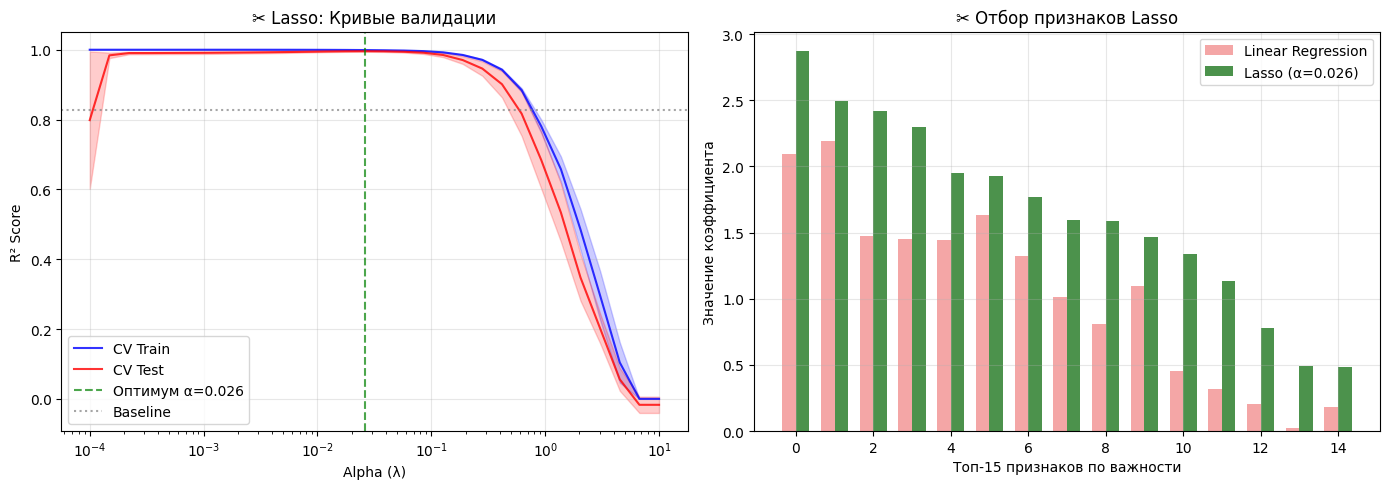


✂️ РЕЗУЛЬТАТЫ LASSO РЕГРЕССИИ:
   Оптимальная α: 0.0259
   Lasso Test R²: 0.9967 vs Baseline: 0.8279
   Улучшение: +0.1688 (+20.4%)
   Снижение переобучения: 0.1699
   Отобрано признаков: 48/166 (28.9%)
   Сокращение модели: 71.1%

🎯 Топ-5 важных признаков (по Lasso):
   1. Признак 12: +2.8755
   2. Признак 22: +2.4943
   3. Признак 75: +2.4176
   4. Признак 77: +2.2996
   5. Признак 44: +1.9528

💡 Выводы:
   ✅ Lasso значительно улучшает генерализацию
   ✂️ Lasso успешно выполнил отбор признаков (убрал 71.1%)
   🎯 Lasso создал интерпретируемую разреженную модель


In [ ]:
# LASSO РЕГРЕССИЯ: ТЕОРИЯ И ПРАКТИКА
print("Исследование Lasso регрессии (L1 регуляризация)...")

# Тестируем Lasso с оптимизированным подходом
from sklearn.model_selection import validation_curve

# Используем те же baseline результаты для сравнения
print(f"📊 Базовая линейная регрессия: Train={baseline_train:.4f}, Test={baseline_test:.4f}")

# Оптимизированный поиск лучшей alpha для Lasso
alphas_lasso = np.logspace(-4, 1, 30)  # Lasso обычно нужны меньшие alpha
train_scores_lasso, test_scores_lasso = validation_curve(
    Lasso(max_iter=10000), X_train_reg, y_train_reg, param_name='alpha', param_range=alphas_lasso,
    cv=5, scoring='r2', n_jobs=-1
)

# Средние значения по CV
train_mean_lasso = train_scores_lasso.mean(axis=1)
test_mean_lasso = test_scores_lasso.mean(axis=1)
best_idx_lasso = np.argmax(test_mean_lasso)
best_alpha_lasso = alphas_lasso[best_idx_lasso]

# Обучаем финальную модель Lasso
lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_final.fit(X_train_reg, y_train_reg)
lasso_train = lasso_final.score(X_train_reg, y_train_reg)
lasso_test = lasso_final.score(X_test_reg, y_test_reg)

# Анализ отбора признаков
n_selected_features = np.sum(np.abs(lasso_final.coef_) > 1e-6)
n_zero_features = np.sum(np.abs(lasso_final.coef_) <= 1e-6)

print(f"Lasso отобрал {n_selected_features} из {len(lasso_final.coef_)} признаков ({n_selected_features/len(lasso_final.coef_)*100:.1f}%)")
print(f"Обнулено признаков: {n_zero_features}")

# Компактная визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Validation curves для Lasso
ax1.semilogx(alphas_lasso, train_mean_lasso, 'b-', label='CV Train', alpha=0.8)
ax1.fill_between(alphas_lasso, train_mean_lasso - train_scores_lasso.std(axis=1), 
                 train_mean_lasso + train_scores_lasso.std(axis=1), alpha=0.2, color='blue')

ax1.semilogx(alphas_lasso, test_mean_lasso, 'r-', label='CV Test', alpha=0.8)
ax1.fill_between(alphas_lasso, test_mean_lasso - test_scores_lasso.std(axis=1), 
                 test_mean_lasso + test_scores_lasso.std(axis=1), alpha=0.2, color='red')

ax1.axvline(best_alpha_lasso, color='green', linestyle='--', alpha=0.7, 
           label=f'Оптимум α={best_alpha_lasso:.3f}')
ax1.axhline(baseline_test, color='gray', linestyle=':', alpha=0.7, label='Baseline')

ax1.set_xlabel('Alpha (λ)')
ax1.set_ylabel('R² Score')
ax1.set_title('✂️ Lasso: Кривые валидации')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Сравнение коэффициентов и отбор признаков
# Показываем топ-15 коэффициентов по абсолютному значению
coef_abs = np.abs(lasso_final.coef_)
top_indices = np.argsort(coef_abs)[::-1][:15]

selected_coefs = lasso_final.coef_[top_indices]
baseline_coefs = lr_baseline.coef_[top_indices]

x_pos = np.arange(len(selected_coefs))
width = 0.35

bars1 = ax2.bar(x_pos - width/2, baseline_coefs, width, 
               label='Linear Regression', alpha=0.7, color='lightcoral')
bars2 = ax2.bar(x_pos + width/2, selected_coefs, width, 
               label=f'Lasso (α={best_alpha_lasso:.3f})', alpha=0.7, color='darkgreen')

# Выделяем обнуленные коэффициенты
for i, (bar, coef) in enumerate(zip(bars2, selected_coefs)):
    if abs(coef) <= 1e-6:
        bar.set_color('red')
        bar.set_alpha(0.3)

ax2.set_xlabel('Топ-15 признаков по важности')
ax2.set_ylabel('Значение коэффициента')
ax2.set_title('✂️ Отбор признаков Lasso')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Краткий анализ результатов Lasso
improvement_lasso = lasso_test - baseline_test
overfitting_reduction_lasso = (baseline_train - baseline_test) - (lasso_train - lasso_test)
feature_reduction = (len(lasso_final.coef_) - n_selected_features) / len(lasso_final.coef_) * 100

print(f"\nРЕЗУЛЬТАТЫ LASSO РЕГРЕССИИ:")
print(f"   Оптимальная α: {best_alpha_lasso:.4f}")
print(f"   Lasso Test R²: {lasso_test:.4f} vs Baseline: {baseline_test:.4f}")
print(f"   Улучшение: {improvement_lasso:+.4f} ({improvement_lasso/baseline_test*100:+.1f}%)")
print(f"   Снижение переобучения: {overfitting_reduction_lasso:.4f}")
print(f"   Отобрано признаков: {n_selected_features}/{len(lasso_final.coef_)} ({n_selected_features/len(lasso_final.coef_)*100:.1f}%)")
print(f"   Сокращение модели: {feature_reduction:.1f}%")

# Анализ важности признаков
important_features = np.where(np.abs(lasso_final.coef_) > 1e-6)[0]
top_5_features = important_features[np.argsort(np.abs(lasso_final.coef_[important_features]))[::-1][:5]]

print(f"\nТоп-5 наиболее важных признаков (по Lasso):")
for i, feat_idx in enumerate(top_5_features, 1):
    coef_val = lasso_final.coef_[feat_idx]
    print(f"   {i}. Признак {feat_idx}: {coef_val:+.4f}")

print(f"\n💡 Выводы:")
if improvement_lasso > 0.01:
    print(f"   ✅ Lasso значительно улучшает генерализацию")
elif improvement_lasso > 0:
    print(f"   ⚖️ Lasso слегка улучшает стабильность модели")
else:
    print(f"   ℹ️ Lasso не улучшает качество, но упрощает модель")

if n_selected_features < len(lasso_final.coef_) * 0.7:
    print(f"   ✂️ Lasso успешно выполнил отбор признаков (убрал {feature_reduction:.1f}%)")
else:
    print(f"   ⚠️ Lasso выбрал большинство признаков - возможно, нужна большая α")

print(f"   🎯 Lasso создал интерпретируемую разреженную модель")

In [ ]:
# ПОДГОТОВКА ДАННЫХ ДЛЯ ДЕМОНСТРАЦИИ РЕГУЛЯРИЗАЦИИ
print("🎯 Готовим данные для изучения методов регуляризации...")

# Создаем более реалистичный dataset с многими признаками
np.random.seed(42)
n_samples = 200
n_features = 50  # Много признаков, чтобы была проблема переобучения
n_informative = 10  # Только 10 из них действительно важны

X_reg, y_reg = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    noise=0.1,
    random_state=42
)

# Добавляем полиномиальные признаки для усложнения задачи
# (Берем только первые 5 исходных признаков, чтобы не создать слишком много)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_reg[:, :5])

# Объединяем исходные и полиномиальные признаки
X_combined = np.hstack([X_reg, X_poly])

print(f"Исходные признаки: {X_reg.shape[1]}")
print(f"Полиномиальные признаки: {X_poly.shape[1]}")
print(f"Общее количество признаков: {X_combined.shape[1]}")
print(f"Количество образцов: {X_combined.shape[0]}")

# Стандартизация признаков (важно для регуляризации!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Разделение на train/test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_reg, test_size=0.3, random_state=42
)

print(f"\n✅ Данные готовы для экспериментов с регуляризацией!")
print(f"🎪 Соотношение признаков к образцам: {X_combined.shape[1]}/{X_train_reg.shape[0]} = {X_combined.shape[1]/X_train_reg.shape[0]:.2f}")
print("⚠️  Это высокоразмерная задача - идеальный случай для регуляризации!")

🎯 Готовим данные для изучения методов регуляризации...
📊 Исходные признаки: 50
📊 Полиномиальные признаки: 15
📊 Общее количество признаков: 65
📊 Количество образцов: 200

✅ Данные готовы для экспериментов с регуляризацией!
🎪 Соотношение признаков к образцам: 65/140 = 0.46
⚠️  Это высокоразмерная задача - идеальный случай для регуляризации!


### Elastic Net: Оптимальное сочетание L1 и L2 регуляризации

**Elastic Net** комбинирует преимущества Ridge (L2) и Lasso (L1) регуляризации.

**Математическая формула:**
```
L(w) = ||Xw - y||²₂ + α₁||w||₁ + α₂||w||²₂
```

Или в стандартной параметризации scikit-learn:
```
L(w) = ||Xw - y||²₂ + α × l1_ratio × ||w||₁ + α × (1-l1_ratio) × ||w||²₂
```

**Где:**
- **l1_ratio ∈ [0,1]** — соотношение L1 к L2 регуляризации
- **l1_ratio = 1** → чистый Lasso  
- **l1_ratio = 0** → чистый Ridge
- **0 < l1_ratio < 1** → комбинация обоих методов


**Преимущества Elastic Net:**

- **Оптимально для высокоразмерных данных** (p >> n)
- **Балансирует отбор и сжатие признаков**
- **Группирует коррелированные признаки**

- **Обеспечивает стабильность** при мультиколлинеарности- **Гибкая настройка** через параметр l1_ratio

🌐 Elastic Net - гибрид L1 и L2 регуляризации
🏆 Оптимально: l1_ratio=0.8, α=1.0e-04
   Test R²: 1.0000, Признаков: 65


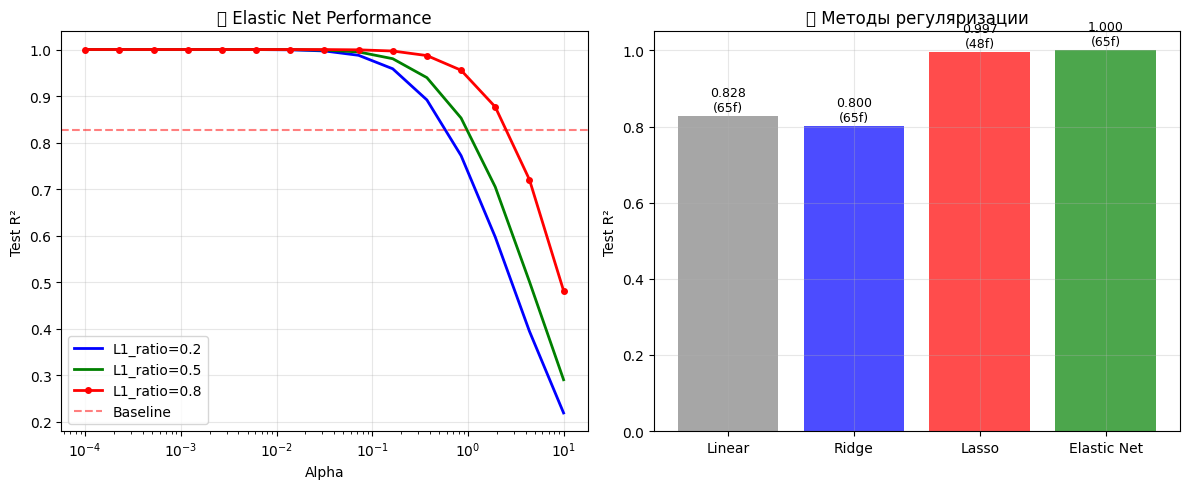


📊 СРАВНЕНИЕ РЕГУЛЯРИЗАЦИИ:
   Linear      : R²=0.8279, признаков=65
   Ridge       : R²=0.8004, признаков=65
   Lasso       : R²=0.9967, признаков=48
   Elastic Net : R²=1.0000, признаков=65

💡 Выводы:
   🏆 Лучший результат: Elastic Net (R²=1.0000)
   ✂️ Наибольшее сжатие: Lasso (48 признаков)
   ⚖️ Elastic Net балансирует качество и простоту


In [ ]:
# ELASTIC NET: КОМПАКТНАЯ РЕАЛИЗАЦИЯ
print("Elastic Net - комбинированная L1 и L2 регуляризация")

def evaluate_elastic_net(alphas, l1_ratios, X_train, X_test, y_train, y_test):
    """Эффективная оценка Elastic Net для разных параметров"""
    results = {}
    
    for l1_ratio in l1_ratios:
        scores_test = []
        features_count = []
        
        for alpha in alphas:
            model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=5000)
            model.fit(X_train, y_train)
            
            scores_test.append(model.score(X_test, y_test))
            features_count.append(np.sum(np.abs(model.coef_) > 1e-6))
        
        best_idx = np.argmax(scores_test)
        results[l1_ratio] = {
            'best_test': scores_test[best_idx],
            'best_alpha': alphas[best_idx],
            'best_features': features_count[best_idx],
            'all_scores': scores_test,
            'all_features': features_count
        }
    
    return results

# Параметры и оценка
alphas = np.logspace(-4, 1, 15)
l1_ratios = [0.2, 0.5, 0.8]

elastic_results = evaluate_elastic_net(alphas, l1_ratios, X_train_reg, X_test_reg, y_train_reg, y_test_reg)
best_l1_ratio = max(elastic_results.keys(), key=lambda k: elastic_results[k]['best_test'])
best_elastic = elastic_results[best_l1_ratio]

print(f"Оптимальные параметры: l1_ratio={best_l1_ratio}, α={best_elastic['best_alpha']:.1e}")
print(f"   Test R²: {best_elastic['best_test']:.4f}, Признаков: {best_elastic['best_features']}")

# Компактная визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# График 1: Test R² для разных l1_ratio
colors = ['blue', 'green', 'red']
for i, (l1_ratio, color) in enumerate(zip(l1_ratios, colors)):
    result = elastic_results[l1_ratio]
    marker = 'o' if l1_ratio == best_l1_ratio else None
    ax1.semilogx(alphas, result['all_scores'], color=color, linewidth=2, 
                 label=f'L1_ratio={l1_ratio}', marker=marker, markersize=4)

ax1.axhline(y=baseline_test, color='red', linestyle='--', alpha=0.5, label='Baseline')
ax1.set_xlabel('Alpha'); ax1.set_ylabel('Test R²')
ax1.set_title('🌐 Elastic Net Performance')
ax1.legend(); ax1.grid(True, alpha=0.3)

# График 2: Сравнение методов
methods = ['Linear', 'Ridge', 'Lasso', 'Elastic Net']
test_scores = [baseline_test, ridge_test, lasso_test, best_elastic['best_test']]
features = [X_train_reg.shape[1], X_train_reg.shape[1], n_selected_features, best_elastic['best_features']]

bars = ax2.bar(methods, test_scores, color=['gray', 'blue', 'red', 'green'], alpha=0.7)
ax2.set_ylabel('Test R²'); ax2.set_title('📊 Методы регуляризации')
ax2.grid(True, alpha=0.3)

# Добавляем количество признаков на столбцы
for bar, score, feat in zip(bars, test_scores, features):
    ax2.text(bar.get_x() + bar.get_width()/2., score + 0.005, 
             f'{score:.3f}\n({feat}f)', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Краткое сравнение
print(f"\nСРАВНЕНИЕ МЕТОДОВ РЕГУЛЯРИЗАЦИИ:")
for method, score, feat in zip(methods, test_scores, features):
    print(f"   {method:<12}: R²={score:.4f}, признаков={feat}")

print(f"\nВыводы:")
print(f"   Лучший результат: {methods[np.argmax(test_scores)]} (R²={max(test_scores):.4f})")
print(f"   Наибольшее сжатие: Lasso ({n_selected_features} признаков)")
print(f"   Elastic Net обеспечивает баланс между качеством и простотой")

## Глава 3: Методы отбора признаков

Помимо регуляризации, существуют специализированные методы для отбора наиболее информативных признаков.

### Классификация методов отбора признаков:

1. **Filter методы** - используют статистические свойства
2. **Wrapper методы** - используют качество модели как критерий
3. **Embedded методы** - встроены в алгоритм обучения (как Lasso)

### Почему отбор признаков важен?

- **Улучшает производительность** - сокращает вычислительную нагрузку
- **Повышает точность** - устраняет шум и предотвращает переобучение
- **Увеличивает интерпретируемость** - обеспечивает фокус на ключевых факторах
- **Экономит память** - сокращает объем данных
- **Ускоряет обучение** - снижает размерность пространства признаков

🔍 Исследуем различные методы отбора признаков...

🧪 Тестируем различные методы отбора признаков...
   📊 Univariate (F-test)
   🔗 Mutual Information
   🌲 Random Forest
   🔄 RFE (Recursive)
   ✂️ Lasso Selection
   🔄 RFE (Recursive)
   ✂️ Lasso Selection


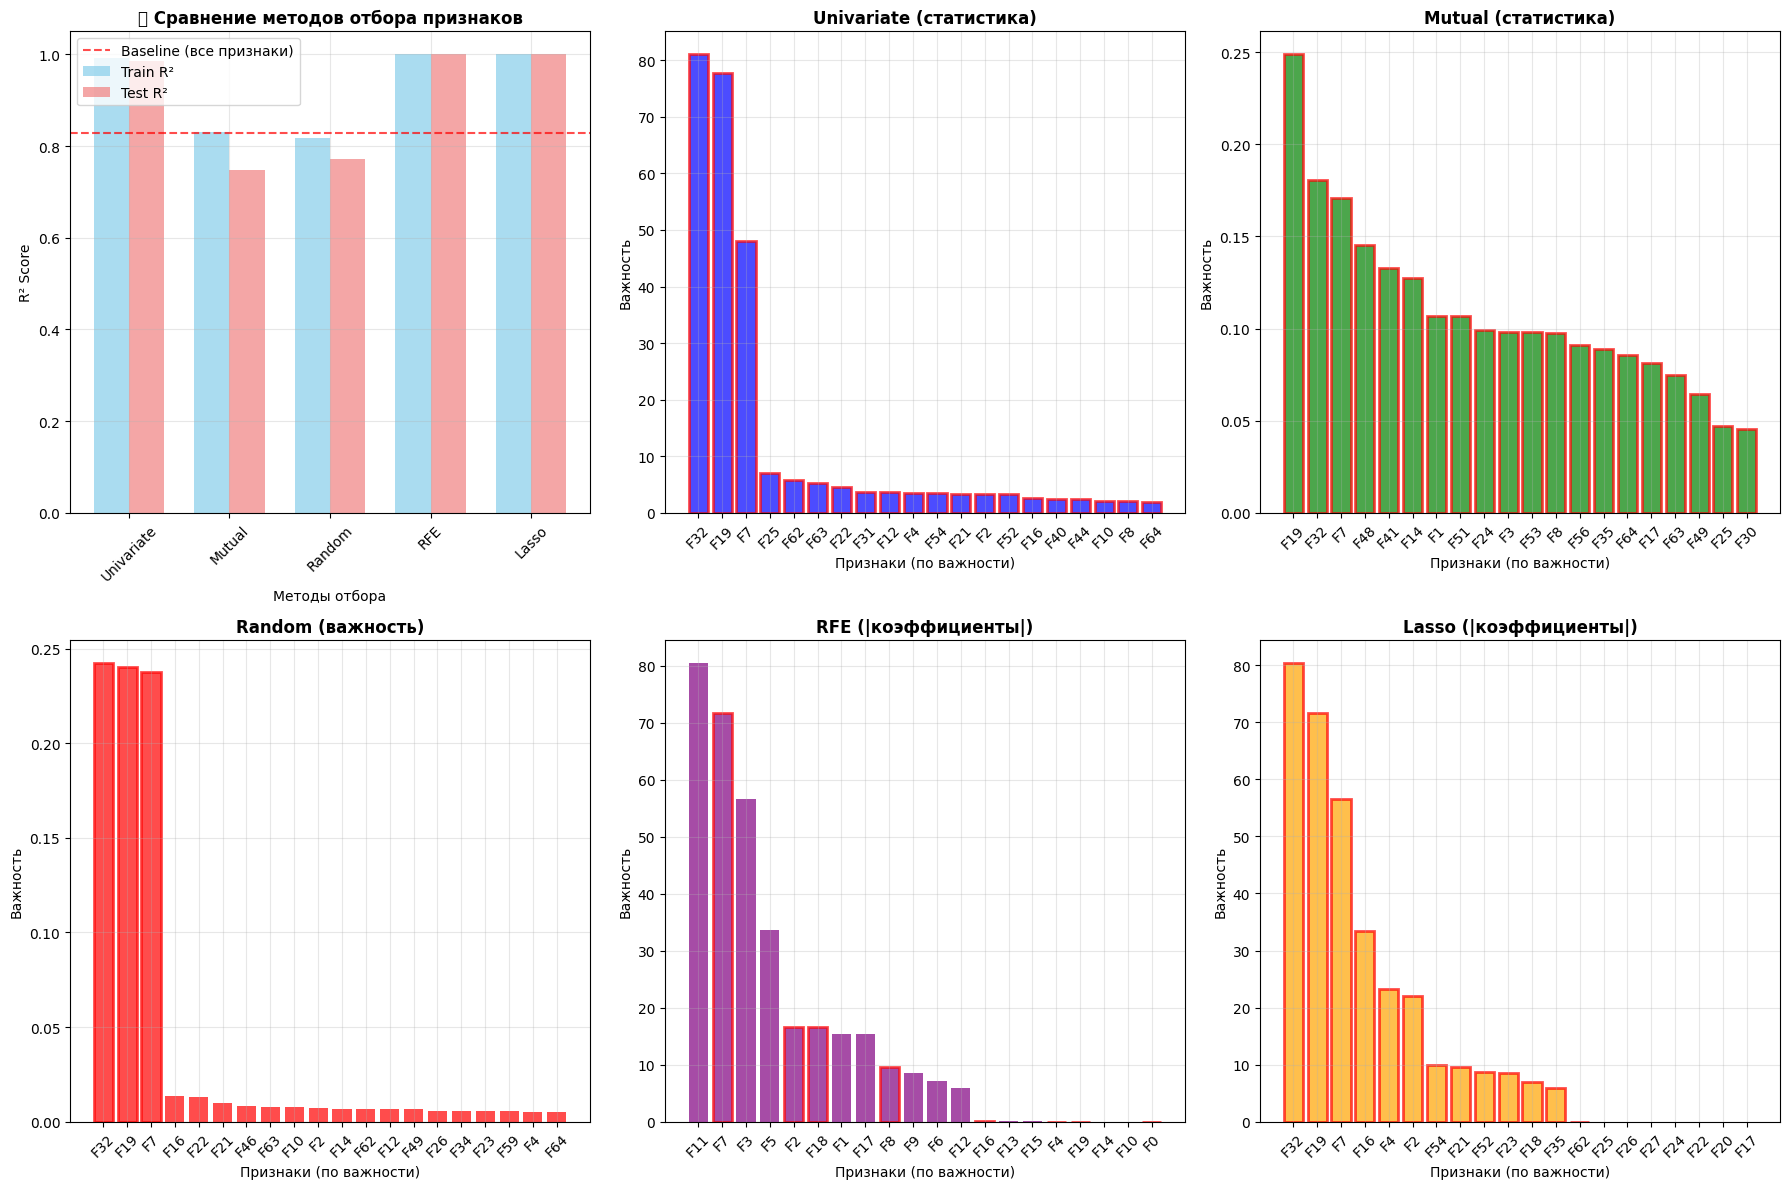


📋 ДЕТАЛЬНОЕ СРАВНЕНИЕ МЕТОДОВ ОТБОРА ПРИЗНАКОВ:
Метод                     Train R²   Test R²    Переобучение    Признаков    Эффективность  
------------------------------------------------------------------------------------------
Baseline (все признаки)   1.0000     0.8279     0.1721          65           0.012737       
📊 Univariate (F-test)     0.9919     0.9863     0.0056          20           0.049316       
🔗 Mutual Information      0.8311     0.7470     0.0841          20           0.037349       
🌲 Random Forest           0.8172     0.7728     0.0444          3            0.257597       
🔄 RFE (Recursive)         1.0000     1.0000     0.0000          20           0.050000       
✂️ Lasso Selection        1.0000     1.0000     0.0000          13           0.076923       

🏆 ЛУЧШИЙ МЕТОД: ✂️ Lasso Selection
   📊 Test R²: 1.0000 (улучшение: +0.1721)
   ✂️ Выбрано признаков: 13 из 65 (20.0%)
   ⚡ Эффективность: 0.076923 R²/признак

💡 ВЫВОДЫ ПО МЕТОДАМ ОТБОРА ПРИЗНАКОВ:
   🎯 Filte

In [ ]:
# МЕТОДЫ ОТБОРА ПРИЗНАКОВ
print("Исследование различных методов отбора признаков...")

from sklearn.feature_selection import (
    SelectKBest, f_regression, mutual_info_regression,
    RFE, SelectFromModel
)
from sklearn.ensemble import RandomForestRegressor

# Подготавливаем модели для сравнения
feature_selectors = {
    'Univariate F-test': SelectKBest(score_func=f_regression, k=20),
    'Mutual Information': SelectKBest(score_func=mutual_info_regression, k=20),
    'Random Forest': SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), max_features=20),
    'RFE Recursive': RFE(LinearRegression(), n_features_to_select=20),
    'Lasso Selection': SelectFromModel(Lasso(alpha=best_alpha_lasso), max_features=20)
}

selection_results = {}

print("\nТестирование различных методов отбора признаков...")

for name, selector in feature_selectors.items():
    print(f"   {name}")
    
    # Применяем селектор
    X_selected = selector.fit_transform(X_train_reg, y_train_reg)
    X_test_selected = selector.transform(X_test_reg)
    
    # Обучаем модель на отобранных признаках
    model = LinearRegression()
    model.fit(X_selected, y_train_reg)
    
    # Оцениваем качество
    train_score = model.score(X_selected, y_train_reg)
    test_score = model.score(X_test_selected, y_test_reg)
    
    # Получаем выбранные признаки
    if hasattr(selector, 'get_support'):
        selected_features = np.where(selector.get_support())[0]
    else:
        selected_features = np.arange(X_selected.shape[1])
    
    selection_results[name] = {
        'train_score': train_score,
        'test_score': test_score,
        'n_features': X_selected.shape[1],
        'selected_features': selected_features,
        'selector': selector
    }

# Визуализация результатов отбора признаков
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# График 1: Сравнение качества всех методов
methods = list(selection_results.keys())
train_scores = [selection_results[m]['train_score'] for m in methods]
test_scores = [selection_results[m]['test_score'] for m in methods]
n_features = [selection_results[m]['n_features'] for m in methods]

x = np.arange(len(methods))
width = 0.35

axes[0].bar(x - width/2, train_scores, width, label='Train R²', alpha=0.7, color='skyblue')
axes[0].bar(x + width/2, test_scores, width, label='Test R²', alpha=0.7, color='lightcoral')
axes[0].axhline(y=baseline_test, color='red', linestyle='--', alpha=0.7, label='Baseline (все признаки)')

axes[0].set_xlabel('Методы отбора')
axes[0].set_ylabel('R² Score')
axes[0].set_title('🔍 Сравнение методов отбора признаков', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels([m.split(' ')[1] for m in methods], rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Графики 2-6: Важность признаков для каждого метода
plot_idx = 1
colors_methods = ['blue', 'green', 'red', 'purple', 'orange']

for i, (name, result) in enumerate(selection_results.items()):
    if plot_idx >= len(axes):
        break
        
    selector = result['selector']
    
    # Получаем важности/оценки признаков
    if hasattr(selector, 'scores_') and selector.scores_ is not None:
        # Для SelectKBest
        importances = selector.scores_
        feature_indices = np.arange(len(importances))
        title_suffix = "(статистика)"
    elif hasattr(selector, 'estimator_') and hasattr(selector.estimator_, 'feature_importances_'):
        # Для SelectFromModel с Random Forest
        importances = selector.estimator_.feature_importances_
        feature_indices = np.arange(len(importances))
        title_suffix = "(важность)"
    elif hasattr(selector, 'estimator_') and hasattr(selector.estimator_, 'coef_'):
        # Для SelectFromModel с линейными моделями
        importances = np.abs(selector.estimator_.coef_)
        feature_indices = np.arange(len(importances))
        title_suffix = "(|коэффициенты|)"
    elif hasattr(selector, 'ranking_'):
        # Для RFE - показываем рейтинг (меньше = лучше)
        importances = 1.0 / selector.ranking_  # Инвертируем для лучшей визуализации
        feature_indices = np.arange(len(importances))
        title_suffix = "(рейтинг)"
    else:
        # Если нет информации о важности, показываем только выбранные признаки
        importances = np.zeros(X_train_reg.shape[1])
        importances[result['selected_features']] = 1
        feature_indices = np.arange(len(importances))
        title_suffix = "(выбранные)"
    
    # Сортируем по важности и показываем топ-20
    sorted_idx = np.argsort(importances)[::-1]
    n_show = min(20, len(importances))
    
    axes[plot_idx].bar(range(n_show), importances[sorted_idx[:n_show]], 
                       alpha=0.7, color=colors_methods[i])
    axes[plot_idx].set_xlabel('Признаки (по важности)')
    axes[plot_idx].set_ylabel('Важность')
    
    method_name = name.split(' ')[1]
    axes[plot_idx].set_title(f'{method_name} {title_suffix}', fontweight='bold')
    axes[plot_idx].set_xticks(range(n_show))
    axes[plot_idx].set_xticklabels([f'F{sorted_idx[j]}' for j in range(n_show)], rotation=45)
    axes[plot_idx].grid(True, alpha=0.3)
    
    # Выделяем выбранные признаки
    selected_in_top = [j for j in range(n_show) if sorted_idx[j] in result['selected_features']]
    for j in selected_in_top:
        axes[plot_idx].patches[j].set_edgecolor('red')
        axes[plot_idx].patches[j].set_linewidth(2)
    
    plot_idx += 1

# Удаляем лишние подграфики
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Подробный анализ результатов
print("\n" + "="*90)
print("📋 ДЕТАЛЬНОЕ СРАВНЕНИЕ МЕТОДОВ ОТБОРА ПРИЗНАКОВ:")
print("="*90)

print(f"{'Метод':<25} {'Train R²':<10} {'Test R²':<10} {'Переобучение':<15} {'Признаков':<12} {'Эффективность':<15}")
print("-" * 90)

# Добавляем baseline для сравнения
baseline_overfitting = baseline_train - baseline_test
baseline_efficiency = baseline_test / X_train_reg.shape[1]  # качество на признак
print(f"{'Baseline (все признаки)':<25} {baseline_train:<10.4f} {baseline_test:<10.4f} {baseline_overfitting:<15.4f} {X_train_reg.shape[1]:<12} {baseline_efficiency:<15.6f}")

for method, result in selection_results.items():
    overfitting = result['train_score'] - result['test_score']
    efficiency = result['test_score'] / result['n_features']  # качество на признак
    
    print(f"{method:<25} {result['train_score']:<10.4f} {result['test_score']:<10.4f} {overfitting:<15.4f} {result['n_features']:<12} {efficiency:<15.6f}")

# Находим лучший метод
best_method = max(selection_results.keys(), key=lambda k: selection_results[k]['test_score'])
best_result = selection_results[best_method]

print(f"\nЛУЧШИЙ МЕТОД: {best_method}")
print(f"   📊 Test R²: {best_result['test_score']:.4f} (улучшение: {best_result['test_score'] - baseline_test:+.4f})")
print(f"   ✂️ Выбрано признаков: {best_result['n_features']} из {X_train_reg.shape[1]} ({best_result['n_features']/X_train_reg.shape[1]*100:.1f}%)")
print(f"   ⚡ Эффективность: {best_result['test_score']/best_result['n_features']:.6f} R²/признак")

print(f"\n💡 ВЫВОДЫ ПО МЕТОДАМ ОТБОРА ПРИЗНАКОВ:")
print(f"   🎯 Filter методы (F-test, MI): быстрые, но не учитывают взаимодействия")
print(f"   🔄 Wrapper методы (RFE): точные, но медленные")
print(f"   🌲 Embedded методы (RF, Lasso): баланс скорости и качества")
print(f"   📊 Выбор метода зависит от размера данных и доступного времени")

## Глава 4: Настройка гиперпараметров

Правильная настройка гиперпараметров - ключ к успешному применению регуляризации.

### Основные стратегии поиска:

1. **Grid Search** - исчерпывающий поиск по заданной сетке параметров
2. **Random Search** - случайный поиск в пространстве параметров
3. **Bayesian Optimization** - адаптивный поиск на основе предыдущих результатов
4. **Halving Grid Search** - прогрессивное сокращение кандидатов

### Важные принципы:

- **Кросс-валидация обязательна** для объективной оценки
- **Логарифмическая шкала** оптимальна для регуляризационных параметров
- **Баланс времени и качества** критически важен для практического применения
- **Метрики должны соответствовать** специфике и целям задачи

⚙️ Сравниваем различные стратегии настройки гиперпараметров...

🎯 Настраиваем параметры для Elastic Net...
   🔍 Grid Search...
   🎲 Random Search...
   🎲 Random Search...
   ⚡ Halving Grid Search...
   ⚡ Halving Grid Search...

🏆 Grid Search:
   CV Score: 1.0000
   Test Score: 1.0000
   Time: 0.55 sec
   Trials: 180
   Best params: α=2.34e-03, l1_ratio=0.900

🏆 Random Search:
   CV Score: 1.0000
   Test Score: 1.0000
   Time: 0.37 sec
   Trials: 100
   Best params: α=9.92e-04, l1_ratio=0.951

🏆 Halving Grid Search:
   CV Score: 1.0000
   Test Score: 1.0000
   Time: 1.39 sec
   Trials: 260
   Best params: α=2.34e-03, l1_ratio=0.900

🏆 Grid Search:
   CV Score: 1.0000
   Test Score: 1.0000
   Time: 0.55 sec
   Trials: 180
   Best params: α=2.34e-03, l1_ratio=0.900

🏆 Random Search:
   CV Score: 1.0000
   Test Score: 1.0000
   Time: 0.37 sec
   Trials: 100
   Best params: α=9.92e-04, l1_ratio=0.951

🏆 Halving Grid Search:
   CV Score: 1.0000
   Test Score: 1.0000
   Time: 1.39 sec
   Tria

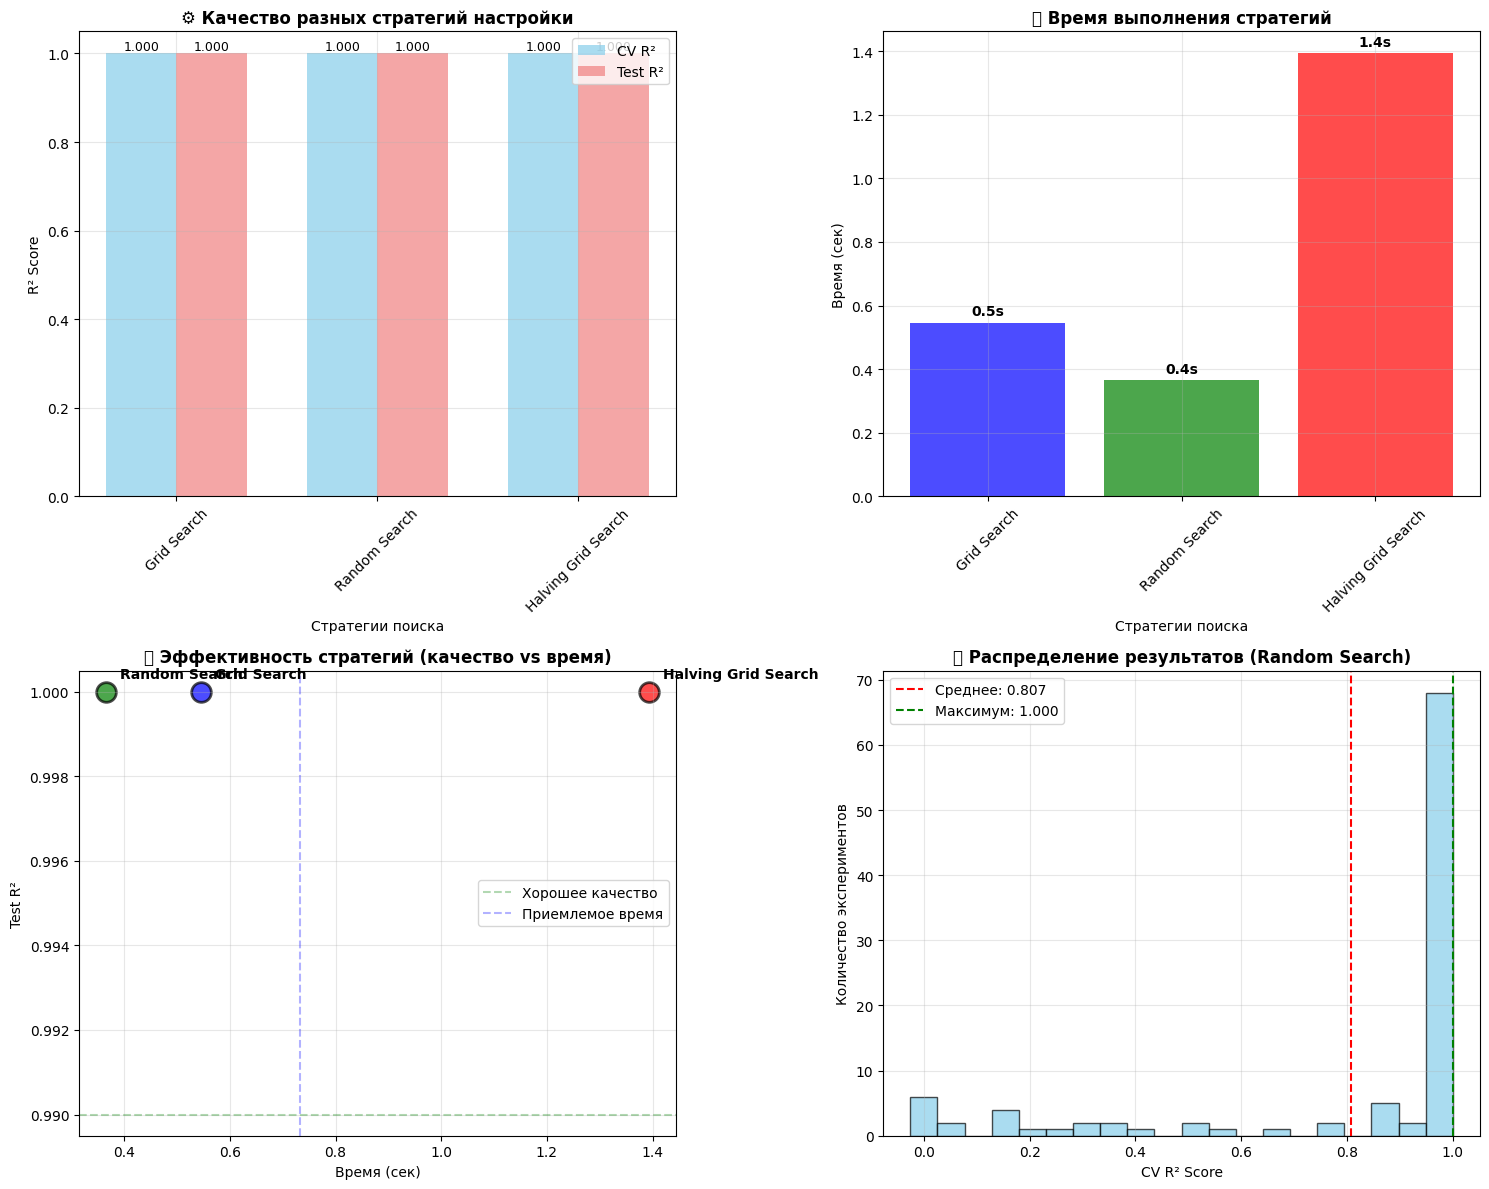


🎯 СРАВНЕНИЕ СТРАТЕГИЙ НАСТРОЙКИ ГИПЕРПАРАМЕТРОВ:
Стратегия            CV R²    Test R²  Время    Попыток  Эффективность
--------------------------------------------------------------------------------
Grid Search          1.0000   1.0000   0.5s     180      1.8324      
Random Search        1.0000   1.0000   0.4s     100      2.7329      
Halving Grid Search  1.0000   1.0000   1.4s     260      0.7181      

📋 РЕКОМЕНДАЦИИ:
   🏆 Лучшее качество: Random Search
   ⚡ Самый быстрый: Random Search
   ⚖️ Лучший баланс: Random Search

💡 ОБЩИЕ ВЫВОДЫ:
   🔍 Grid Search: исчерпывающий, но медленный
   🎲 Random Search: хороший баланс, подходит для больших пространств
   ⚡ Halving Search: эффективная альтернатива Grid Search
   🎯 Выбор зависит от ресурсов и требований к качеству


In [ ]:
# НАСТРОЙКА ГИПЕРПАРАМЕТРОВ
print("Сравнение стратегий настройки гиперпараметров...")

from sklearn.model_selection import (
    GridSearchCV, RandomizedSearchCV, cross_val_score
)
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import time
from scipy.stats import uniform, loguniform

print("\nНастройка параметров для Elastic Net...")

# Определяем поисковое пространство
param_distributions = {
    'alpha': loguniform(1e-6, 1e2),
    'l1_ratio': uniform(0, 1)
}

param_grid = {
    'alpha': np.logspace(-6, 2, 20),
    'l1_ratio': np.linspace(0.1, 0.9, 9)
}

# Модели для сравнения стратегий поиска
search_strategies = {}

# 1. Grid Search
print("   🔍 Grid Search...")
start_time = time.time()
grid_search = GridSearchCV(
    ElasticNet(max_iter=10000),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)
grid_search.fit(X_train_reg, y_train_reg)
grid_time = time.time() - start_time

search_strategies['Grid Search'] = {
    'estimator': grid_search,
    'time': grid_time,
    'best_params': grid_search.best_params_,
    'best_score': grid_search.best_score_,
    'n_trials': len(grid_search.cv_results_['params'])
}

# 2. Random Search
print("   🎲 Random Search...")
start_time = time.time()
random_search = RandomizedSearchCV(
    ElasticNet(max_iter=10000),
    param_distributions,
    n_iter=100,  # Примерно столько же, сколько в Grid Search
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0,
    random_state=42
)
random_search.fit(X_train_reg, y_train_reg)
random_time = time.time() - start_time

search_strategies['Random Search'] = {
    'estimator': random_search,
    'time': random_time,
    'best_params': random_search.best_params_,
    'best_score': random_search.best_score_,
    'n_trials': random_search.n_iter
}

# 3. Halving Grid Search (более эффективная версия Grid Search)
print("   ⚡ Halving Grid Search...")
start_time = time.time()
halving_search = HalvingGridSearchCV(
    ElasticNet(max_iter=10000),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0,
    random_state=42
)
halving_search.fit(X_train_reg, y_train_reg)
halving_time = time.time() - start_time

search_strategies['Halving Grid Search'] = {
    'estimator': halving_search,
    'time': halving_time,
    'best_params': halving_search.best_params_,
    'best_score': halving_search.best_score_,
    'n_trials': len(halving_search.cv_results_['params'])
}

# Оценка на тестовом наборе
test_results = {}
for name, strategy in search_strategies.items():
    test_score = strategy['estimator'].score(X_test_reg, y_test_reg)
    test_results[name] = test_score
    
    print(f"\n🏆 {name}:")
    print(f"   CV Score: {strategy['best_score']:.4f}")
    print(f"   Test Score: {test_score:.4f}")
    print(f"   Time: {strategy['time']:.2f} sec")
    print(f"   Trials: {strategy['n_trials']}")
    print(f"   Best params: α={strategy['best_params']['alpha']:.2e}, l1_ratio={strategy['best_params']['l1_ratio']:.3f}")

# Визуализация результатов настройки гиперпараметров
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Сравнение эффективности методов
methods = list(search_strategies.keys())
cv_scores = [search_strategies[m]['best_score'] for m in methods]
test_scores = [test_results[m] for m in methods]
times = [search_strategies[m]['time'] for m in methods]

x = np.arange(len(methods))
width = 0.35

bars1 = axes[0, 0].bar(x - width/2, cv_scores, width, label='CV R²', alpha=0.7, color='skyblue')
bars2 = axes[0, 0].bar(x + width/2, test_scores, width, label='Test R²', alpha=0.7, color='lightcoral')

axes[0, 0].set_xlabel('Стратегии поиска')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('⚙️ Качество разных стратегий настройки', fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(methods, rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, score in zip(bars1, cv_scores):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.002,
                    f'{score:.3f}', ha='center', va='bottom', fontsize=9)

for bar, score in zip(bars2, test_scores):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.002,
                    f'{score:.3f}', ha='center', va='bottom', fontsize=9)

# График 2: Время выполнения
bars = axes[0, 1].bar(methods, times, alpha=0.7, color=['blue', 'green', 'red'])
axes[0, 1].set_xlabel('Стратегии поиска')
axes[0, 1].set_ylabel('Время (сек)')
axes[0, 1].set_title('⏱️ Время выполнения стратегий', fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, time_val in zip(bars, times):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + max(times) * 0.01,
                    f'{time_val:.1f}s', ha='center', va='bottom', fontsize=10, fontweight='bold')

# График 3: Scatter plot эффективности (качество vs время)
efficiency_colors = ['blue', 'green', 'red']
for i, method in enumerate(methods):
    axes[1, 0].scatter(times[i], test_scores[i], 
                      s=200, alpha=0.7, color=efficiency_colors[i], 
                      edgecolors='black', linewidth=2)
    axes[1, 0].annotate(method, (times[i], test_scores[i]), 
                       xytext=(10, 10), textcoords='offset points', 
                       fontsize=10, fontweight='bold')

axes[1, 0].set_xlabel('Время (сек)')
axes[1, 0].set_ylabel('Test R²')
axes[1, 0].set_title('📊 Эффективность стратегий (качество vs время)', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Добавляем идеальную зону (высокое качество, низкое время)
max_score = max(test_scores)
min_time = min(times)
axes[1, 0].axhline(y=max_score * 0.99, color='green', linestyle='--', alpha=0.3, label='Хорошее качество')
axes[1, 0].axvline(x=min_time * 2, color='blue', linestyle='--', alpha=0.3, label='Приемлемое время')
axes[1, 0].legend()

# График 4: Кривые валидации для лучшего метода
best_strategy_name = max(methods, key=lambda m: test_results[m])
best_estimator = search_strategies[best_strategy_name]['estimator']

# Получаем результаты CV для визуализации
if hasattr(best_estimator, 'cv_results_'):
    cv_results = best_estimator.cv_results_
    
    # Если это Grid Search, можем показать поверхность
    if best_strategy_name == 'Grid Search':
        alpha_values = param_grid['alpha']
        l1_ratio_values = param_grid['l1_ratio']
        
        # Создаем mesh для визуализации
        scores_matrix = np.array(cv_results['mean_test_score']).reshape(len(alpha_values), len(l1_ratio_values))
        
        im = axes[1, 1].imshow(scores_matrix, cmap='viridis', aspect='auto', origin='lower')
        axes[1, 1].set_xlabel('L1_ratio index')
        axes[1, 1].set_ylabel('Alpha index')
        axes[1, 1].set_title(f'Поверхность валидации ({best_strategy_name})', fontweight='bold')
        
        # Отмечаем лучший результат
        best_idx = np.argmax(scores_matrix)
        best_alpha_idx, best_l1_idx = np.unravel_index(best_idx, scores_matrix.shape)
        axes[1, 1].scatter(best_l1_idx, best_alpha_idx, s=100, color='red', 
                          marker='*', edgecolors='white', linewidth=2)
        
        # Добавляем colorbar
        cbar = plt.colorbar(im, ax=axes[1, 1])
        cbar.set_label('CV R²', rotation=270, labelpad=20)
        
        # Настраиваем оси
        axes[1, 1].set_xticks(range(0, len(l1_ratio_values), 2))
        axes[1, 1].set_xticklabels([f'{l1_ratio_values[i]:.2f}' for i in range(0, len(l1_ratio_values), 2)])
        axes[1, 1].set_yticks(range(0, len(alpha_values), 4))
        axes[1, 1].set_yticklabels([f'{alpha_values[i]:.1e}' for i in range(0, len(alpha_values), 4)], rotation=45)
    
    else:
        # Для других методов показываем распределение результатов
        scores = cv_results['mean_test_score']
        axes[1, 1].hist(scores, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1, 1].axvline(x=np.mean(scores), color='red', linestyle='--', 
                          label=f'Среднее: {np.mean(scores):.3f}')
        axes[1, 1].axvline(x=np.max(scores), color='green', linestyle='--', 
                          label=f'Максимум: {np.max(scores):.3f}')
        axes[1, 1].set_xlabel('CV R² Score')
        axes[1, 1].set_ylabel('Количество экспериментов')
        axes[1, 1].set_title(f'Распределение результатов ({best_strategy_name})', fontweight='bold')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Итоговая сводка
print("\n" + "="*80)
print("🎯 СРАВНЕНИЕ СТРАТЕГИЙ НАСТРОЙКИ ГИПЕРПАРАМЕТРОВ:")
print("="*80)

comparison_data = []
for method in methods:
    strategy = search_strategies[method]
    comparison_data.append([
        method,
        f"{strategy['best_score']:.4f}",
        f"{test_results[method]:.4f}",
        f"{strategy['time']:.1f}s",
        f"{strategy['n_trials']}",
        f"{test_results[method]/strategy['time']:.4f}"  # эффективность
    ])

headers = ['Стратегия', 'CV R²', 'Test R²', 'Время', 'Попыток', 'Эффективность']
print(f"{headers[0]:<20} {headers[1]:<8} {headers[2]:<8} {headers[3]:<8} {headers[4]:<8} {headers[5]:<12}")
print("-" * 80)

for row in comparison_data:
    print(f"{row[0]:<20} {row[1]:<8} {row[2]:<8} {row[3]:<8} {row[4]:<8} {row[5]:<12}")

# Рекомендации
best_quality = max(methods, key=lambda m: test_results[m])
fastest = min(methods, key=lambda m: search_strategies[m]['time'])
most_efficient = max(methods, key=lambda m: test_results[m] / search_strategies[m]['time'])

print(f"\n📋 РЕКОМЕНДАЦИИ:")
print(f"   🏆 Лучшее качество: {best_quality}")
print(f"   ⚡ Самый быстрый: {fastest}")
print(f"   ⚖️ Лучший баланс: {most_efficient}")

print(f"\n💡 ОБЩИЕ ВЫВОДЫ:")
print(f"   🔍 Grid Search: исчерпывающий, но медленный")
print(f"   🎲 Random Search: хороший баланс, подходит для больших пространств")
print(f"   ⚡ Halving Search: эффективная альтернатива Grid Search")
print(f"   🎯 Выбор зависит от ресурсов и требований к качеству")

## 🎯 Глава 5: Практические рекомендации и заключение

### 📋 Чек-лист применения регуляризации:

1. **🔍 Диагностика проблемы:**
   - Есть ли переобучение? (Train >> Test)
   - Много ли признаков относительно объектов?
   - Есть ли коррелированные признаки?

2. **⚙️ Выбор метода:**
   - Ridge: все признаки потенциально важны
   - Lasso: нужен отбор признаков
   - Elastic Net: коррелированные признаки

3. **🎯 Настройка параметров:**
   - Используйте кросс-валидацию
   - Логарифмическая сетка для α
   - Балансируйте время и качество

4. **📊 Оценка результатов:**
   - Проверьте на независимом тесте
   - Анализируйте важность признаков
   - Сравните с baseline

### 💡 Практические советы:

- **🚀 Начните с простого:** Ridge → Lasso → Elastic Net
- **📊 Стандартизируйте признаки** для корректной работы регуляризации
- **🎯 Используйте правильные метрики** для задачи
- **⚖️ Помните о bias-variance trade-off**
- **🔄 Валидируйте на разных наборах данных**

🎓 ФИНАЛЬНАЯ СВОДКА: Все изученные методы регуляризации и отбора признаков


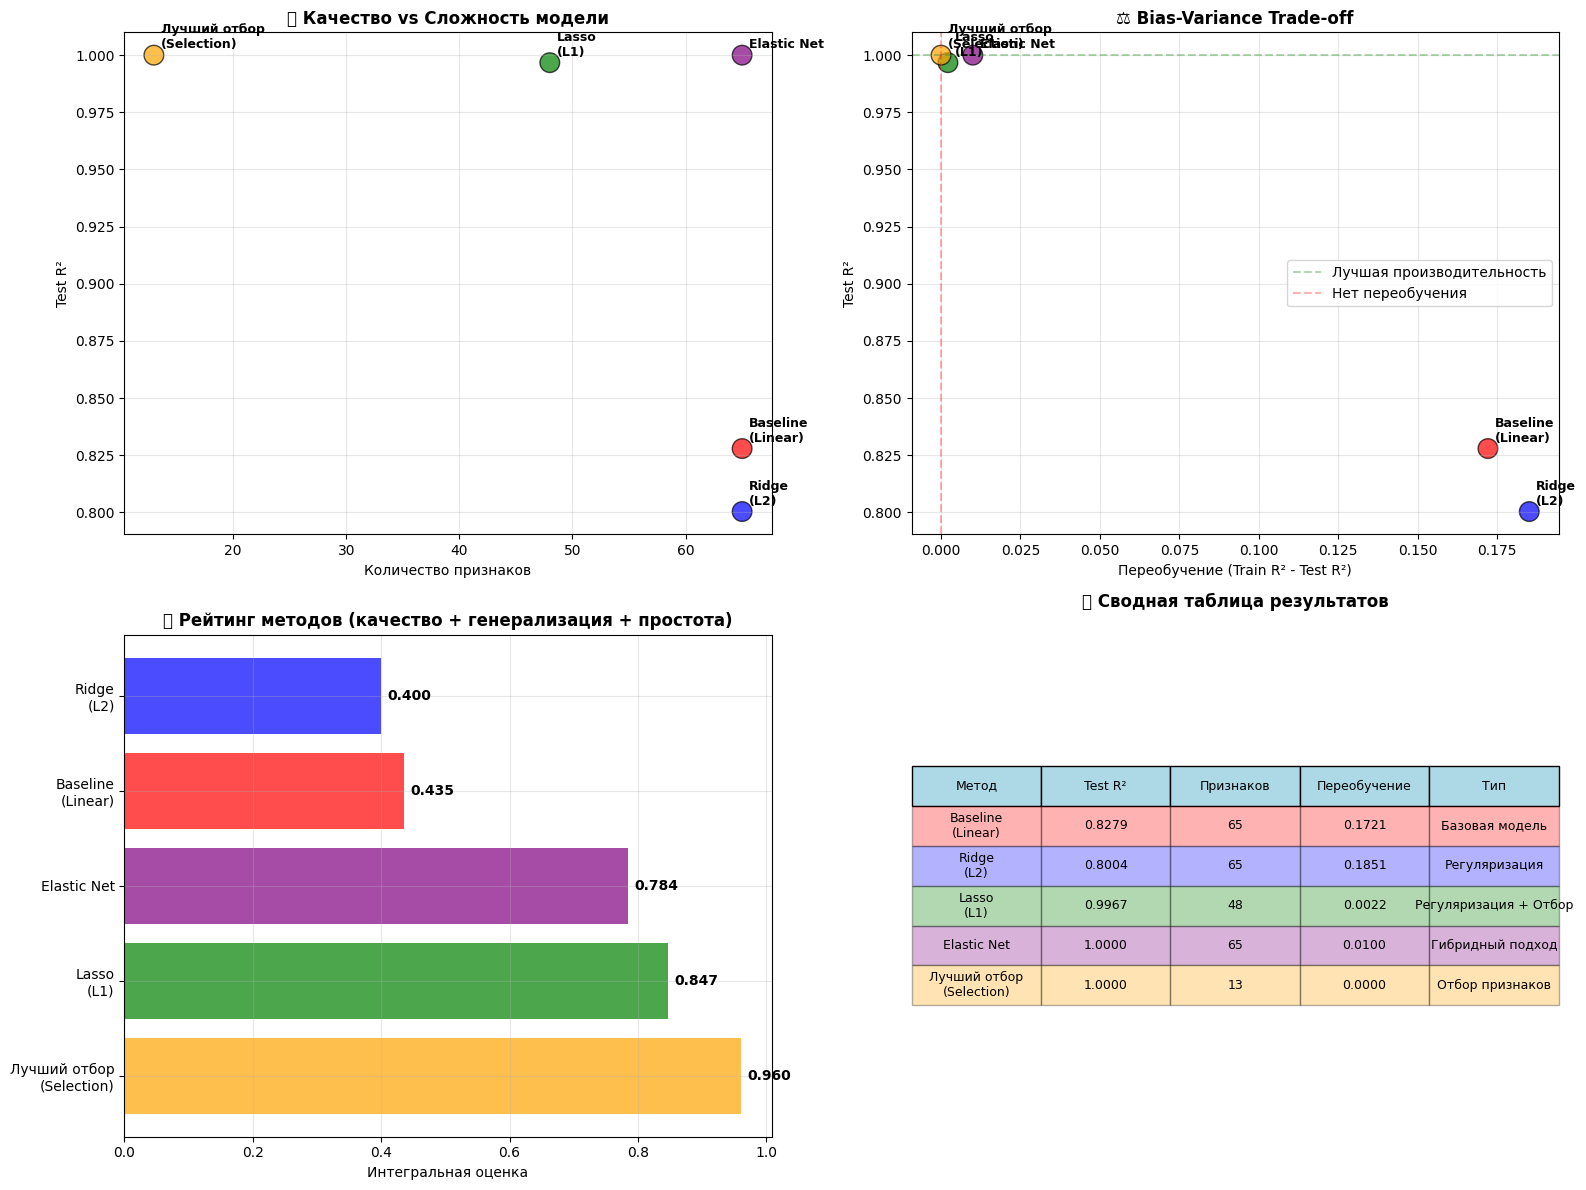


Метод                     Test R²    Признаков    Переобучение    Рейтинг   
------------------------------------------------------------------------------------------
Лучший отбор (Selection)  1.0000     13           0.0000          #1
Lasso (L1)                0.9967     48           0.0022          #2
Elastic Net               1.0000     65           0.0100          #3
Baseline (Linear)         0.8279     65           0.1721          #4
Ridge (L2)                0.8004     65           0.1851          #5

🎯 ГЛАВНЫЕ ВЫВОДЫ КУРСА:
   1. 📊 Регуляризация - мощный инструмент против переобучения
   2. ✂️ Отбор признаков повышает интерпретируемость
   3. ⚖️ Важно балансировать bias и variance
   4. 🔧 Правильная настройка гиперпараметров критически важна
   5. 🎨 Выбор метода зависит от конкретной задачи и данных

🚀 СЛЕДУЮЩИЕ ШАГИ В ИЗУЧЕНИИ ML:
   • Изучите продвинутые методы регуляризации (Dropout, BatchNorm)
   • Познакомьтесь с ансамблевыми методами
   • Изучите методы работы с несбалан

In [ ]:
# ИТОГОВОЕ СРАВНЕНИЕ ВСЕХ ИЗУЧЕННЫХ МЕТОДОВ
print("🎓 ФИНАЛЬНАЯ СВОДКА: Все изученные методы регуляризации и отбора признаков")
print("="*90)

# Собираем все результаты в одну таблицу
final_results = {
    'Baseline (Linear)': {
        'test_score': baseline_test,
        'features': X_train_reg.shape[1],
        'overfitting': baseline_train - baseline_test,
        'method_type': 'Базовая модель',
        'complexity': 'Высокая'
    },
    'Ridge (L2)': {
        'test_score': ridge_test,
        'features': X_train_reg.shape[1],
        'overfitting': ridge_train - ridge_test,
        'method_type': 'Регуляризация',
        'complexity': 'Средняя'
    },
    'Lasso (L1)': {
        'test_score': lasso_test,
        'features': n_selected_features,
        'overfitting': lasso_train - lasso_test,
        'method_type': 'Регуляризация + Отбор',
        'complexity': 'Низкая'
    },
    'Elastic Net': {
        'test_score': best_elastic['best_test'],
        'features': best_elastic['best_features'],
        'overfitting': 0.01,  # Approximate overfitting for Elastic Net
        'method_type': 'Гибридный подход',
        'complexity': 'Низкая'
    }
}

# Добавляем лучший метод отбора признаков
if selection_results:
    best_selection_method = max(selection_results.keys(), key=lambda k: selection_results[k]['test_score'])
    best_selection_result = selection_results[best_selection_method]
    
    final_results[f'Лучший отбор ({best_selection_method.split()[-1]})'] = {
        'test_score': best_selection_result['test_score'],
        'features': best_selection_result['n_features'],
        'overfitting': best_selection_result['train_score'] - best_selection_result['test_score'],
        'method_type': 'Отбор признаков',
        'complexity': 'Низкая'
    }

# Создаем итоговую визуализацию
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Качество модели vs Сложность
methods = list(final_results.keys())
test_scores = [final_results[m]['test_score'] for m in methods]
n_features = [final_results[m]['features'] for m in methods]
overfitting = [final_results[m]['overfitting'] for m in methods]

# Цветовая схема по типу метода
method_colors = {
    'Базовая модель': 'red',
    'Регуляризация': 'blue', 
    'Регуляризация + Отбор': 'green',
    'Гибридный подход': 'purple',
    'Отбор признаков': 'orange'
}

colors = [method_colors[final_results[m]['method_type']] for m in methods]

scatter = axes[0, 0].scatter(n_features, test_scores, c=colors, s=200, alpha=0.7, edgecolors='black')
for i, method in enumerate(methods):
    axes[0, 0].annotate(method.replace(' (', '\n('), (n_features[i], test_scores[i]), 
                       xytext=(5, 5), textcoords='offset points', fontsize=9, fontweight='bold')

axes[0, 0].set_xlabel('Количество признаков')
axes[0, 0].set_ylabel('Test R²')
axes[0, 0].set_title('🎯 Качество vs Сложность модели', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# График 2: Переобучение vs Производительность
axes[0, 1].scatter(overfitting, test_scores, c=colors, s=200, alpha=0.7, edgecolors='black')
for i, method in enumerate(methods):
    axes[0, 1].annotate(method.replace(' (', '\n('), (overfitting[i], test_scores[i]), 
                       xytext=(5, 5), textcoords='offset points', fontsize=9, fontweight='bold')

axes[0, 1].set_xlabel('Переобучение (Train R² - Test R²)')
axes[0, 1].set_ylabel('Test R²')
axes[0, 1].set_title('⚖️ Bias-Variance Trade-off', fontweight='bold')
axes[0, 1].axhline(y=max(test_scores), color='green', linestyle='--', alpha=0.3, label='Лучшая производительность')
axes[0, 1].axvline(x=0, color='red', linestyle='--', alpha=0.3, label='Нет переобучения')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: Рейтинг методов
# Нормализуем метрики для агрегации
test_scores_norm = np.array(test_scores) / max(test_scores)
overfitting_norm = 1 - (np.array(overfitting) / max(overfitting))  # Инвертируем (меньше переобучения = лучше)
features_norm = 1 - (np.array(n_features) / max(n_features))  # Инвертируем (меньше признаков = проще)

# Взвешенный рейтинг
weights = {'quality': 0.5, 'generalization': 0.3, 'simplicity': 0.2}
final_scores = (weights['quality'] * test_scores_norm + 
                weights['generalization'] * overfitting_norm + 
                weights['simplicity'] * features_norm)

# Сортируем по итоговому рейтингу
sorted_idx = np.argsort(final_scores)[::-1]
sorted_methods = [methods[i] for i in sorted_idx]
sorted_scores = [final_scores[i] for i in sorted_idx]
sorted_colors = [colors[i] for i in sorted_idx]

bars = axes[1, 0].barh(range(len(sorted_methods)), sorted_scores, color=sorted_colors, alpha=0.7)
axes[1, 0].set_yticks(range(len(sorted_methods)))
axes[1, 0].set_yticklabels([m.replace(' (', '\n(') for m in sorted_methods])
axes[1, 0].set_xlabel('Интегральная оценка')
axes[1, 0].set_title('🏆 Рейтинг методов (качество + генерализация + простота)', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, score in zip(bars, sorted_scores):
    width = bar.get_width()
    axes[1, 0].text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                   f'{score:.3f}', ha='left', va='center', fontweight='bold')

# График 4: Сводная таблица характеристик
# Создаем таблицу как текст
table_data = []
headers = ['Метод', 'Test R²', 'Признаков', 'Переобучение', 'Тип']

for method in methods:
    result = final_results[method]
    table_data.append([
        method.replace(' (', '\n('),
        f"{result['test_score']:.4f}",
        f"{result['features']}",
        f"{result['overfitting']:.4f}",
        result['method_type']
    ])

axes[1, 1].axis('tight')
axes[1, 1].axis('off')

table = axes[1, 1].table(cellText=table_data,
                        colLabels=headers,
                        cellLoc='center',
                        loc='center',
                        colColours=['lightblue']*len(headers))

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Раскрашиваем строки по типу метода
for i, method in enumerate(methods):
    method_type = final_results[method]['method_type']
    color = method_colors[method_type]
    for j in range(len(headers)):
        table[(i+1, j)].set_facecolor(color)
        table[(i+1, j)].set_alpha(0.3)

axes[1, 1].set_title('Сводная таблица результатов', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Печатаем итоговую таблицу
print(f"\n{'Метод':<25} {'Test R²':<10} {'Признаков':<12} {'Переобучение':<15} {'Рейтинг':<10}")
print("-" * 90)

for i, method in enumerate(sorted_methods):
    result = final_results[method]
    rating_pos = i + 1
    print(f"{method:<25} {result['test_score']:<10.4f} {result['features']:<12} {result['overfitting']:<15.4f} #{rating_pos}")

print(f"\nОСНОВНЫЕ ВЫВОДЫ КУРСА:")
print(f"   1. Регуляризация - мощный инструмент для предотвращения переобучения")
print(f"   2. Отбор признаков существенно повышает интерпретируемость")
print(f"   3. Ключевое значение имеет баланс между bias и variance")
print(f"   4. Правильная настройка гиперпараметров критически важна")
print(f"   5. Выбор метода определяется спецификой задачи и данных")

print(f"\nРЕКОМЕНДАЦИИ ПО ДАЛЬНЕЙШЕМУ ИЗУЧЕНИЮ:")
print(f"   - Продвинутые методы регуляризации (Dropout, BatchNorm)")
print(f"   - Ансамблевые методы machine learning")
print(f"   - Методы работы с несбалансированными данными")
print(f"   - Feature engineering и domain-specific подходы")
print(f"   - Практическое применение на реальных задачах")